In [1]:
import re 
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
url = "https://www.amazon.com/Apple-iPhone-12-Mini-Black/product-reviews/B08PPDJWC8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36", 
             "X-Amzn-Trace-Id": "Root=1-63cf0052-760b19697375364569cfc0d0"}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Reviews': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(1,500)):
    soup = get_soup(f'https://www.amazon.com/Apple-iPhone-12-Mini-Black/product-reviews/B08PPDJWC8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

/var/folders/kv/whnvfm_57jzgp49wy4zb278r0000gn/T/ipykernel_64391/3093862992.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,500)):


  0%|          | 0/499 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)

In [7]:
df.head()

,Reviews
0,I wasn't sure what to expect when my phone arr...
1,I like the product. It is not much smaller tha...
2,"Pros: It is a good phone, it had no visible sc..."
3,Am so pleased with the iphone 12 mini. the ba...
4,"Good iphone,a few scratch as expected, battery..."


In [8]:
df.size

1060

In [9]:
df.shape

(1060, 1)

In [10]:
df.columns

Index(['Reviews'], dtype='object')

In [11]:
df.duplicated().sum()

1050

In [12]:
df.isnull().sum()

Reviews    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1060 non-null   object
dtypes: object(1)
memory usage: 8.4+ KB


In [14]:
total_text = " ".join(df["Reviews"])

In [15]:
total_text[:1000]

"I wasn't sure what to expect when my phone arrived, the reviews had mixed experiences. But I am actually pleasantly surprised and so happy I made the purchase. The phone came in great condition, there's a small smuge/scuff on the back near the camera (not on it) but I think I can easily clean that up with a little effort. Besides that, no noticeable damage at all. The battery health is 86% which is way better than what my iphone 7+ was at (77%). I will say that some of the keys on the keyboard can be a little funky, I might have the press them a couple times to get the letter to show up, but I don't know if that's phone's issue OR if I'm just adjusting the having a small screen/keyboard compared to the massive 7+.Overall, still very happy with my purchase and would definitely recommend to a friend! I like the product. It is not much smaller than the newer iphones i compared it to in the store (13 or 14). There are no issues from what i can see. I added my carrier (mint mobile) quickly

In [16]:
char = sorted(list(set(total_text)))

In [17]:
vocab_size = len(char)
print("".join(char))
print(vocab_size)

 !%'()+,-./12345678:=ABCDEGHIMNOPRSTabcdefghijklmnopqrstuvwxyáí’
64


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-z 0-9]","",text)
    return text

In [19]:
clean = lambda x: clean_text(x)

In [20]:
df_new = df.copy()

In [21]:
df_new['Cleaned_Reviews'] = df_new.Reviews.apply(clean)

In [22]:
df_new

,Reviews,Cleaned_Reviews
0,I wasn't sure what to expect when my phone arr...,i wasnt sure what to expect when my phone arri...
1,I like the product. It is not much smaller tha...,i like the product it is not much smaller than...
2,"Pros: It is a good phone, it had no visible sc...",pros it is a good phone it had no visible scra...
3,Am so pleased with the iphone 12 mini. the ba...,am so pleased with the iphone 12 mini the bat...
4,"Good iphone,a few scratch as expected, battery...",good iphonea few scratch as expected battery s...
...,...,...
1055,"Equipo como nuevo, llego la batería en 85% bue...",equipo como nuevo llego la batera en 85 bueno ...
1056,Delivery was way ahead of schedule. Great! Tha...,delivery was way ahead of schedule great thank...
1057,The phone is very nice. There was no scratches...,the phone is very nice there was no scratches ...
1058,The phone is great. The downer is that the cha...,the phone is great the downer is that the char...


In [23]:
clean_total = " ".join(df_new["Cleaned_Reviews"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 12345678abcdefghijklmnopqrstuvwxy
34


In [24]:
df_new['Cleaned_Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    i want sure what to expect when my phone arriv...
1    i like the product it is not much smaller than...
2    pro it is a good phone it had no visible scrat...
3    am so pleased with the phone 12 mind  the batt...
4    good phone few scratch as expected battery see...
5    equip come neuro leg la later en 85 buena con ...
6    delivery was way ahead of schedule great thank...
7    the phone is very nice there was no scratches ...
8    the phone is great the owner is that the charg...
9    exactly as they said it would be though it wou...
Name: Cleaned_Reviews, dtype: object

In [25]:
df_new.head()

,Reviews,Cleaned_Reviews
0,I wasn't sure what to expect when my phone arr...,i wasnt sure what to expect when my phone arri...
1,I like the product. It is not much smaller tha...,i like the product it is not much smaller than...
2,"Pros: It is a good phone, it had no visible sc...",pros it is a good phone it had no visible scra...
3,Am so pleased with the iphone 12 mini. the ba...,am so pleased with the iphone 12 mini the bat...
4,"Good iphone,a few scratch as expected, battery...",good iphonea few scratch as expected battery s...


In [26]:
df_new.duplicated().sum()

1050

In [27]:
df_new['Cleaned_Reviews'].duplicated().sum()

1050

In [28]:
df_new.drop_duplicates(subset=['Cleaned_Reviews'], keep=False)

,Reviews,Cleaned_Reviews


In [29]:
freq = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:10]

In [30]:
freq

the      3710
i        2226
a        2120
is       1908
to       1802
it       1696
phone    1484
and      1060
not       954
on        848
dtype: int64

In [31]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/pranavi/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/pranavi/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/pranavi/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/pranavi/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/pranavi/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/pranavi/nltk_data...
[nltk_data]    |   Package movie_reviews is a

True

In [32]:
stopwords_en = stopwords.words('english')
stopwords_es = stopwords.words('spanish')
stop = stopwords_en +stopwords_es

In [33]:
df_new['Cleaned_Reviews'] = df_new['Cleaned_Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [34]:
df_new.head()

,Reviews,Cleaned_Reviews
0,I wasn't sure what to expect when my phone arr...,wasnt sure expect phone arrived reviews mixed ...
1,I like the product. It is not much smaller tha...,like product much smaller newer iphones compar...
2,"Pros: It is a good phone, it had no visible sc...",pros good phone visible scratches battery life...
3,Am so pleased with the iphone 12 mini. the ba...,pleased iphone 12 mini battery life touch scre...
4,"Good iphone,a few scratch as expected, battery...",good iphonea scratch expected battery seems ho...


In [35]:
TextBlob(df_new['Cleaned_Reviews'][1]).ngrams(3)

[WordList(['like', 'product', 'much']),
 WordList(['product', 'much', 'smaller']),
 WordList(['much', 'smaller', 'newer']),
 WordList(['smaller', 'newer', 'iphones']),
 WordList(['newer', 'iphones', 'compared']),
 WordList(['iphones', 'compared', 'store']),
 WordList(['compared', 'store', '13']),
 WordList(['store', '13', '14']),
 WordList(['13', '14', 'issues']),
 WordList(['14', 'issues', 'see']),
 WordList(['issues', 'see', 'added']),
 WordList(['see', 'added', 'carrier']),
 WordList(['added', 'carrier', 'mint']),
 WordList(['carrier', 'mint', 'mobile']),
 WordList(['mint', 'mobile', 'quickly']),
 WordList(['mobile', 'quickly', 'within']),
 WordList(['quickly', 'within', 'day']),
 WordList(['within', 'day', 'two']),
 WordList(['day', 'two', 'purchasing']),
 WordList(['two', 'purchasing', 'phone']),
 WordList(['purchasing', 'phone', 'iphone']),
 WordList(['phone', 'iphone', '11']),
 WordList(['iphone', '11', 'prior']),
 WordList(['11', 'prior', 'phone']),
 WordList(['prior', 'phone',

In [36]:
TextBlob(df_new['Cleaned_Reviews'][2]).ngrams(2)

[WordList(['pros', 'good']),
 WordList(['good', 'phone']),
 WordList(['phone', 'visible']),
 WordList(['visible', 'scratches']),
 WordList(['scratches', 'battery']),
 WordList(['battery', 'life']),
 WordList(['life', 'okaycons']),
 WordList(['okaycons', 'arrived']),
 WordList(['arrived', 'dirty']),
 WordList(['dirty', 'issues']),
 WordList(['issues', 'screen']),
 WordList(['screen', 'blocked']),
 WordList(['blocked', 'settings']),
 WordList(['settings', 'plug']),
 WordList(['plug', 'mac']),
 WordList(['mac', 'put']),
 WordList(['put', 'phone']),
 WordList(['phone', 'recovery']),
 WordList(['recovery', 'mode']),
 WordList(['mode', 'could']),
 WordList(['could', 'work']),
 WordList(['work', 'overall']),
 WordList(['overall', 'im']),
 WordList(['im', 'happy']),
 WordList(['happy', 'purchase']),
 WordList(['purchase', 'keep']),
 WordList(['keep', 'mind']),
 WordList(['mind', 'might']),
 WordList(['might', 'need']),
 WordList(['need', 'work'])]

In [37]:
freq_Sw = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:20] 

In [38]:
freq_Sw

phone         1484
battery        636
screen         636
would          636
purchase       424
iphone         424
great          424
happy          318
life           318
good           318
im             318
batera         318
new            318
compared       318
apple          212
noticeable     212
might          212
scratch        212
scratches      212
get            212
dtype: int64

In [39]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df_new["Cleaned_Reviews"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences',ascending = False).head())

         term  occurrences  frequency
145     phone         1484   0.046358
176    screen          636   0.019868
219     would          636   0.019868
25    battery          636   0.019868
160  purchase          424   0.013245


In [40]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) 
doc_vec = vectorizer.fit_transform(df_new["Cleaned_Reviews"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()

In [41]:
df1 = pd.DataFrame(denselist, columns = names_features)

In [42]:
df1.head()

,11,12,12mini,13,14,77,7overall,84,85,86,...,uso,vendor,visible,wasnt,way,weight,whats,work,worries,worth
0,0.000000,0.000000,0.0,0.000000,0.000000,0.132112,0.132112,0.0,0.0,0.132112,...,0.0,0.000000,0.000000,0.132112,0.104501,0.000000,0.0,0.000000,0.000000,0.0
1,0.167745,0.000000,0.0,0.167745,0.167745,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.167745,0.0,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.219238,0.000000,0.000000,0.000000,0.0,0.438476,0.000000,0.0
3,0.000000,0.210007,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.210007,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.210007,0.0
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [43]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [44]:
top2_words = get_top_n2_words(df_new["Cleaned_Reviews"], n=200) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,battery life,318
1,happy purchase,212
2,baja rpido,212
3,wasnt sure,106
4,sure expect,106


[Text(0, 0, 'battery life'),
 Text(1, 0, 'happy purchase'),
 Text(2, 0, 'baja rpido'),
 Text(3, 0, 'wasnt sure'),
 Text(4, 0, 'sure expect'),
 Text(5, 0, 'expect phone'),
 Text(6, 0, 'phone arrived'),
 Text(7, 0, 'arrived reviews'),
 Text(8, 0, 'reviews mixed'),
 Text(9, 0, 'mixed experiences'),
 Text(10, 0, 'experiences actually'),
 Text(11, 0, 'actually pleasantly'),
 Text(12, 0, 'pleasantly surprised'),
 Text(13, 0, 'surprised happy'),
 Text(14, 0, 'happy made'),
 Text(15, 0, 'made purchase'),
 Text(16, 0, 'purchase phone'),
 Text(17, 0, 'phone came'),
 Text(18, 0, 'came great'),
 Text(19, 0, 'great condition')]

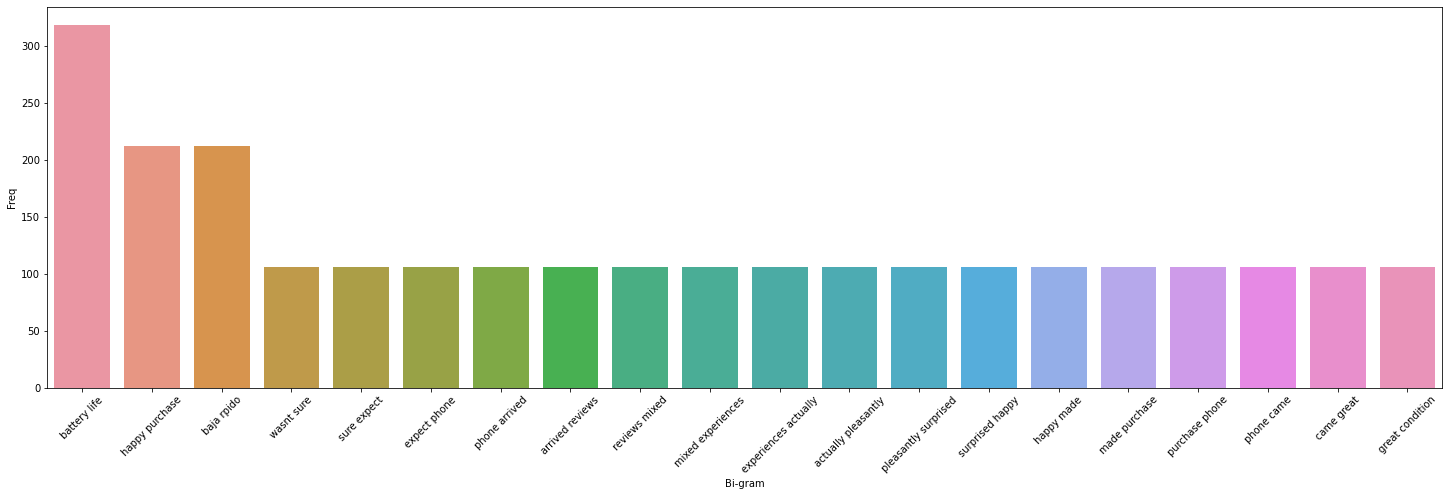

In [45]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [46]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [47]:
top3_words = get_top_n3_words(df_new["Cleaned_Reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,wasnt sure expect,106
1,sure expect phone,106
2,expect phone arrived,106
3,phone arrived reviews,106
4,arrived reviews mixed,106
...,...,...
195,rpido si porq,106
196,si porq est,106
197,porq est 85,106
198,est 85 uso,106


[Text(0, 0, 'wasnt sure expect'),
 Text(1, 0, 'sure expect phone'),
 Text(2, 0, 'expect phone arrived'),
 Text(3, 0, 'phone arrived reviews'),
 Text(4, 0, 'arrived reviews mixed'),
 Text(5, 0, 'reviews mixed experiences'),
 Text(6, 0, 'mixed experiences actually'),
 Text(7, 0, 'experiences actually pleasantly'),
 Text(8, 0, 'actually pleasantly surprised'),
 Text(9, 0, 'pleasantly surprised happy'),
 Text(10, 0, 'surprised happy made'),
 Text(11, 0, 'happy made purchase'),
 Text(12, 0, 'made purchase phone'),
 Text(13, 0, 'purchase phone came'),
 Text(14, 0, 'phone came great'),
 Text(15, 0, 'came great condition'),
 Text(16, 0, 'great condition theres'),
 Text(17, 0, 'condition theres small'),
 Text(18, 0, 'theres small smugescuff'),
 Text(19, 0, 'small smugescuff back')]

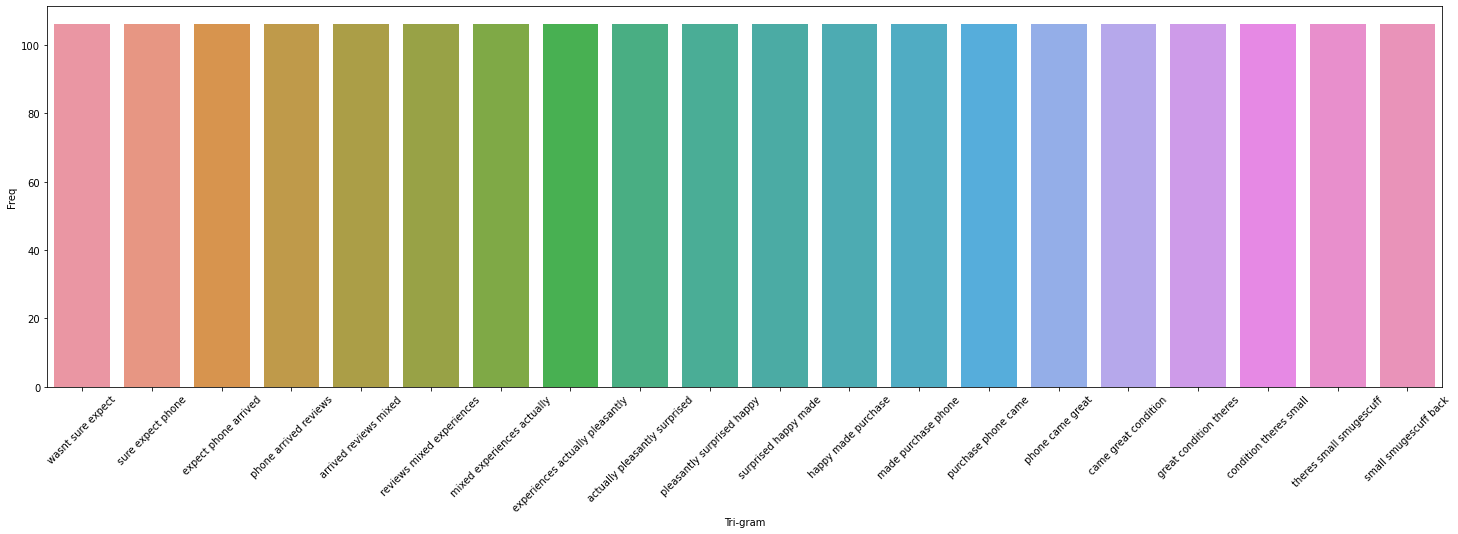

In [48]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [49]:
string_total = " ".join(df_new["Cleaned_Reviews"])
string_total[:2000]

'wasnt sure expect phone arrived reviews mixed experiences actually pleasantly surprised happy made purchase phone came great condition theres small smugescuff back near camera think easily clean little effort besides noticeable damage battery health 86 way better iphone 7 77 say keys keyboard little funky might press couple times get letter show dont know thats phones issue im adjusting small screenkeyboard compared massive 7overall still happy purchase would definitely recommend friend like product much smaller newer iphones compared store 13 14 issues see added carrier mint mobile quickly within day two purchasing phone iphone 11 prior phone difference weight drastic like lugging brick around anymore would prefer price would decrease bit bad compared cost new pros good phone visible scratches battery life okaycons arrived dirty issues screen blocked settings plug mac put phone recovery mode could work overall im happy purchase keep mind might need work pleased iphone 12 mini battery

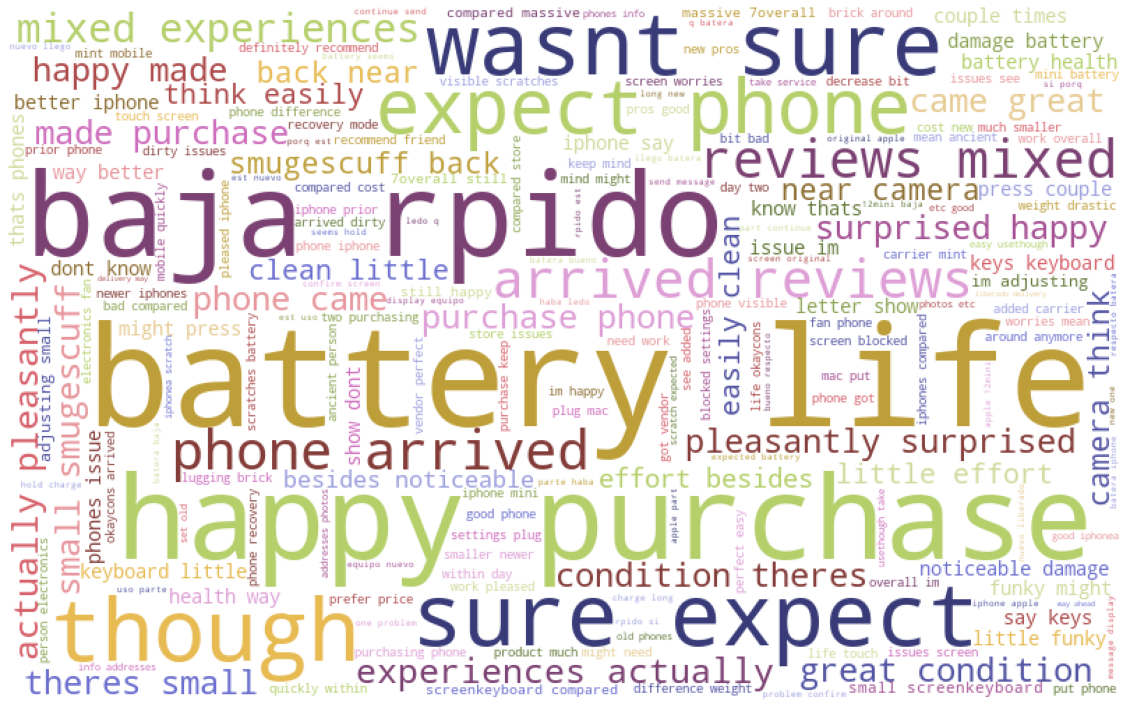

In [63]:
wordcloud_generator = WordCloud(background_color= 'white',colormap='tab20b', width = 800, height = 500).generate(string_total)
fig = plt.figure(figsize = (20,20))
plt.imshow(wordcloud_generator)
plt.axis('off')
plt.show()

In [51]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [52]:
fetch_sentiment_using_textblob = df_new.Cleaned_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,Cleaned_Reviews
positive,954
negative,106


In [53]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pranavi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [54]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df_new.Cleaned_Reviews[4])

{'neg': 0.104, 'neu': 0.695, 'pos': 0.201, 'compound': 0.3612}

In [55]:
df_score=pd.DataFrame()
df_score['Cleaned_Reviews'] = df_new.Cleaned_Reviews
df_score['scores'] = df_new['Cleaned_Reviews'].apply(lambda review: sid.polarity_scores(review))
df_score['compound']  = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.75 else ('Negative' if c<=-0.75  else 'Neutral'))

In [56]:
df_score

,Cleaned_Reviews,scores,compound,sentiment
0,wasnt sure expect phone arrived reviews mixed ...,"{'neg': 0.092, 'neu': 0.568, 'pos': 0.34, 'com...",0.9751,Positive
1,like product much smaller newer iphones compar...,"{'neg': 0.071, 'neu': 0.828, 'pos': 0.101, 'co...",0.1280,Neutral
2,pros good phone visible scratches battery life...,"{'neg': 0.13, 'neu': 0.699, 'pos': 0.171, 'com...",0.3818,Neutral
3,pleased iphone 12 mini battery life touch scre...,"{'neg': 0.071, 'neu': 0.631, 'pos': 0.298, 'co...",0.8402,Positive
4,good iphonea scratch expected battery seems ho...,"{'neg': 0.104, 'neu': 0.695, 'pos': 0.201, 'co...",0.3612,Neutral
...,...,...,...,...
1055,equipo nuevo llego batera 85 bueno respecto ba...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1056,delivery way ahead schedule great thank muchba...,"{'neg': 0.06, 'neu': 0.58, 'pos': 0.36, 'compo...",0.9084,Positive
1057,phone nice scratches screen side cameras troub...,"{'neg': 0.184, 'neu': 0.471, 'pos': 0.345, 'co...",0.6249,Neutral
1058,phone great downer charger generic brand,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.6249,Neutral


In [57]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='tab20b', background_color='white').generate(all_words)
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

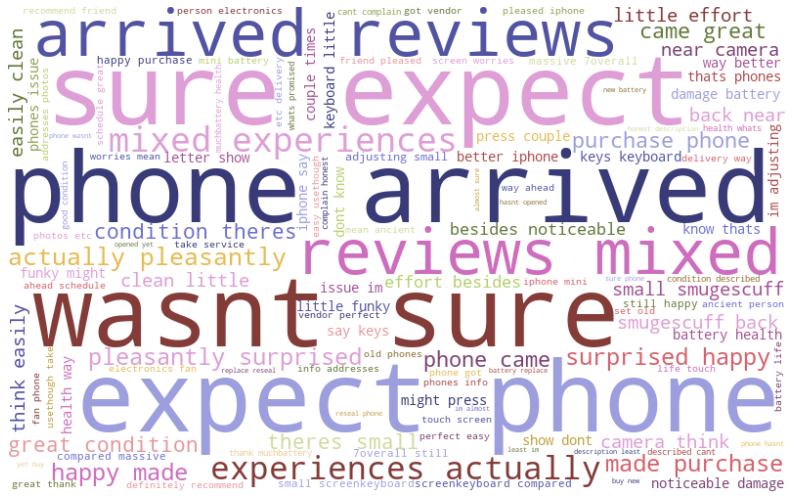

In [58]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Positive']])
generate_wordcloud(all_words)

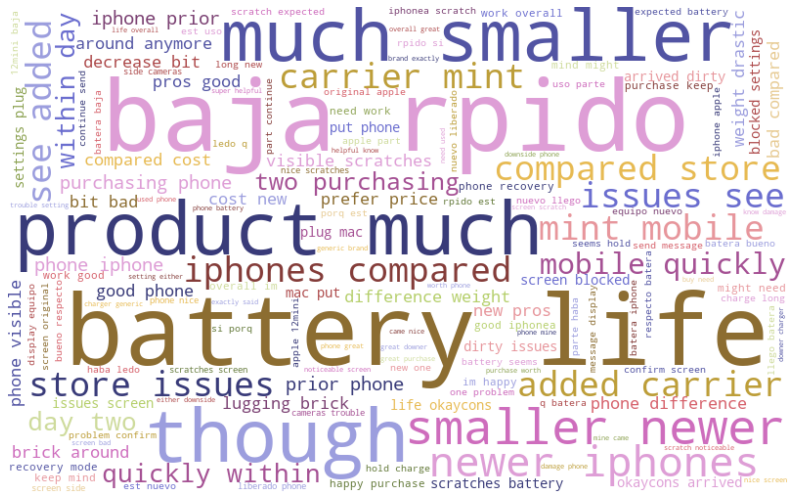

In [59]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Neutral']])
generate_wordcloud(all_words)

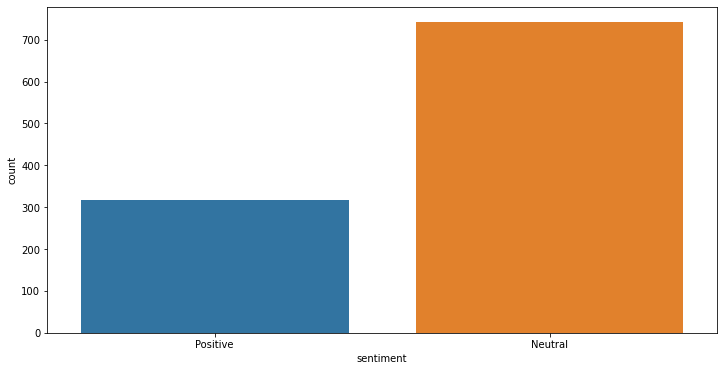

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)
plt.show()

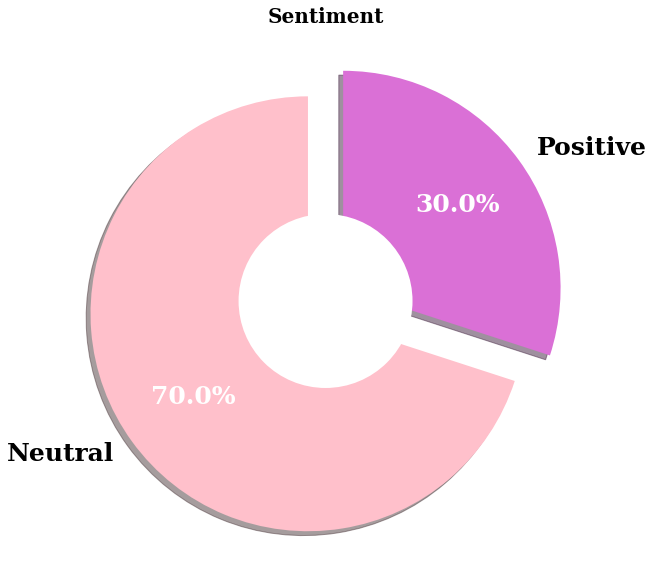

In [61]:
label_data = df_score['sentiment'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['pink', 'orchid'],
                               pctdistance = 0.65,
                               shadow = True,
                               autopct = '%1.1f%%',
                               startangle = 90,
                               explode = explode,
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()